In [1]:
import os

import numpy as np
import importlib
import seaborn as sns
import gymnasium as gym
import matplotlib.pyplot as plt

import gym_env
from models import SR_IS
from utils import get_full_maze_values, policy_reval, decision_policy, update_terminal_reward
from utils_render import plot_decision_prob

In [2]:
# Set the random seed for NumPy
seed = 1
np.random.seed(seed)

# Save dir
save_dir = os.path.join('..', 'figures/')

# For plotting
idx = 4
prob_locs = [3, 5]
colors = [1, 9]

## DR Complete Agent

In [3]:
# Agent to be used with D_inv
agent = SR_IS(env_name="tolman-latent", reward=-1, term_reward=5)
# Make the reward for the first terminal state higher than the second to bias the DR towards that terminal state
# update_terminal_reward(agent, loc=0, r=5)
# update_terminal_reward(agent, loc=1, r=5)

agent.DR = agent.gamma * agent.get_D_inv()
agent.update_V()
maze_values = get_full_maze_values(agent)

In [4]:
pii_old = decision_policy(agent, agent.Z)

In [5]:
pii_old[4]
print(f"Prob left: {pii_old[4][3]} | Prob right: {pii_old[4][5]}")

Prob left: 0.4883122491710901 | Prob right: 0.4883122491710901


In [6]:
# Make the reward for the first terminal state negative and recalculate policy
update_terminal_reward(agent, loc=0, r=-5)
V_new, Z_new = policy_reval(agent)

In [7]:
pii_new = decision_policy(agent, Z_new)

In [8]:
print(f"Prob left: {pii_new[4][3]} | Prob right: {pii_new[4][5]}")

Prob left: 0.02341663522531297 | Prob right: 0.9532078631168673


## With Importance Sampling

In [9]:
# Model Hyperparams
reward = -1
terminal_reward = 5
alpha = 0.2
beta = 1.0
_lambda = 1.0
num_steps = 2500

Prob left: 0.49370630263083837 | Prob right: 0.483178996952268
Prob left: 0.09119432694967651 | Prob right: 0.8875157344129191


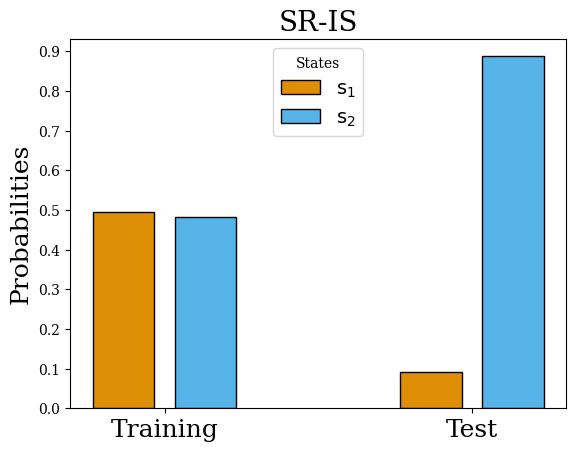

In [10]:
# Agent
agent = SR_IS(env_name="tolman-latent", reward=reward, term_reward=terminal_reward, _lambda=_lambda, beta=beta, alpha=alpha, num_steps=num_steps, policy="softmax", imp_samp=True)
agent.learn(seed=seed)

# Old policy
pii_old = decision_policy(agent, agent.Z)
print(f"Prob left: {pii_old[4][3]} | Prob right: {pii_old[4][5]}")

# Make the reward for the first terminal state negative and recalculate policy
update_terminal_reward(agent, loc=0, r=-5)
V_new, Z_new = policy_reval(agent)

# New policy
pii_new = decision_policy(agent, Z_new)
print(f"Prob left: {pii_new[4][3]} | Prob right: {pii_new[4][5]}")

# Plot
save_path = save_dir + "latent_with_is.png"
plot_decision_prob(probs_train=pii_old[4][prob_locs], probs_test=pii_new[idx][prob_locs], colors=colors, title='SR-IS', leg_loc="upper center", save_path=save_path)

## Without Importance Sampling

Prob left: 0.7807895966672751 | Prob right: 0.12085435246444276
Prob left: 0.004106913075353988 | Prob right: 0.9892304775844201


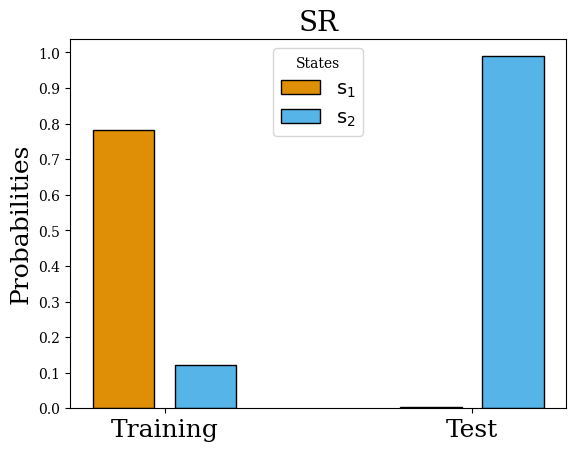

In [11]:
# Agent
agent = SR_IS(env_name="tolman-latent", reward=reward, term_reward=terminal_reward, _lambda=_lambda, beta=beta, alpha=alpha, num_steps=num_steps, policy="softmax", imp_samp=False)
agent.learn(seed=seed)

# Old policy
pii_old = decision_policy(agent, agent.Z)
print(f"Prob left: {pii_old[4][3]} | Prob right: {pii_old[4][5]}")

# Make the reward for the first terminal state negative and recalculate policy
update_terminal_reward(agent, loc=0, r=-5)
V_new, Z_new = policy_reval(agent)

# New policy
pii_new = decision_policy(agent, Z_new)
print(f"Prob left: {pii_new[4][3]} | Prob right: {pii_new[4][5]}")

# Plot
save_path = save_dir + "latent_without_is.png"
plot_decision_prob(probs_train=pii_old[4][prob_locs], probs_test=pii_new[idx][prob_locs], colors=colors, title='SR', leg_loc="upper center", save_path=save_path)